# Project Name: Texas Employee Salary prediction

# Project code: PRCP-1024-TexasSalaryPred

# Project workflow:

1. Project Objective.

2. Data Collection.

3. Exploratory data analysis.

4. Data preprocessing.

5. Data modelling and Evaluation.

# 1. Objective: 

Objective of this notebook is to understand workflow of any statistical regression model and also to be specific is to predict salary of Texas employees.

# 2. Data Collection:

1. The Texas Tribune which is a news organization wants to understand how goverment spending money in public interest. 

2. Database has salary information for positions at all 113 agencies in the Texas state government. The Tribune obtained this data by requesting salary records from the state comptroller, as allowed by the Texas Public Information Act.

3. Very recent 2023 Dataset has been taken and link: https://salaries.texastribune.org/about/.

# Dataset: 

No of features:20

No of observations:140724

Numerical features:6

Categorical features:14

# 3.Exploratory data analysis:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime
from tabulate import tabulate
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [2]:
data=pd.read_csv("/home/mahadev/Desktop/projects/Texas_salary_pred_latest.csv")
data.head()

,AGY,NAME,LASTNAME,FIRSTNAME,MI,JOBCLASS,JC TITLE,RACE,SEX,EMPTYPE,HIREDT,RATE,HRSWKD,MONTHLY,ANNUAL,STATENUM,duplicated,multiple_full_time_jobs,combined_multiple_jobs,hide_from_search,summed_annual_salary
0,781,TEXAS HIGHER EDUCATION COORDINATING BOARD ...,LINSON,ANDREA,C,7040,PROJECT MANAGER ...,BLACK,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,12/1/22,0.00000,40.0,6250.00,75000.00,32448,True,True,NaN,NaN,NaN
1,101,SENATE ...,KENNY,PAT,,7104,LEGISLATIVE PROFESSIONAL ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2/3/05,0.00000,41.0,5433.33,65199.96,37375,True,NaN,True,NaN,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2/1/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,NaN,131407.08
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,9/1/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,True,NaN
4,771,SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED ...,MILLIKIN,RAYMOND,T,7354,LIBRARY ASSISTANT II ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/7/99,0.00000,20.0,1822.14,21865.68,79455,True,NaN,NaN,NaN,42160.44


In [3]:
# Numerical features:

numeric_features=[feature for feature in data.columns if data[feature].dtype!='O']

# Categorical features:

cat_features=set(data.columns).difference(set(numeric_features))

print(tabulate({"Categorical_features": cat_features, "Numeric_features": numeric_features}, headers="keys", tablefmt='grid'))

+-------------------------+----------------------+
| Categorical_features    | Numeric_features     |
+=========================+======================+
| multiple_full_time_jobs | AGY                  |
+-------------------------+----------------------+
| JC TITLE                | RATE                 |
+-------------------------+----------------------+
| JOBCLASS                | HRSWKD               |
+-------------------------+----------------------+
| HIREDT                  | MONTHLY              |
+-------------------------+----------------------+
| hide_from_search        | ANNUAL               |
+-------------------------+----------------------+
| EMPTYPE                 | STATENUM             |
+-------------------------+----------------------+
| NAME                    | summed_annual_salary |
+-------------------------+----------------------+
| FIRSTNAME               |                      |
+-------------------------+----------------------+
| RACE                    |    

# Univariate analysis:
# AGY(agency):

In [4]:
# Total Government agencies/departments in dataset?

print(f"Total {data['AGY'].nunique()} agencies salary information available.")

Total 113 agencies salary information available.


Text(0, 0.5, 'No of employees')

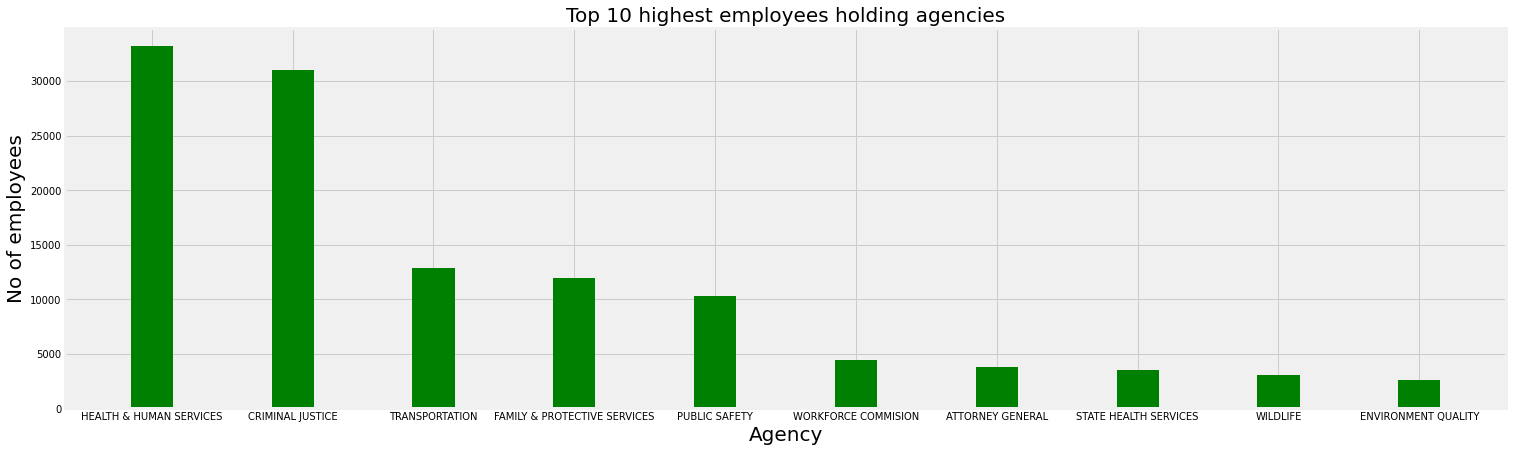

In [5]:
# Ploting top 10 agencies holding highest no of employees.

agency=['HEALTH & HUMAN SERVICES', 'CRIMINAL JUSTICE','TRANSPORTATION','FAMILY & PROTECTIVE SERVICES','PUBLIC SAFETY','WORKFORCE COMMISION','ATTORNEY GENERAL','STATE HEALTH SERVICES','WILDLIFE','ENVIRONMENT QUALITY']

fig = plt.figure(figsize = (23,7))
plt.bar(agency, data['AGY'].value_counts()[0:10], color ='green', width = 0.3)
plt.rcParams.update({'font.size': 12})
plt.title("Top 10 highest employees holding agencies", fontsize=20)
plt.xlabel("Agency", fontsize=20)
plt.ylabel("No of employees", fontsize=20)

Observations:

1. Total 113 agency employees salary data collected.

2. Health and Human services agency having 33218 employees which is the highest.

3. State Prosecuting Attorney agency having only 4 employees which is the least.

4. 71% of total employees belongs to top 5 agencies and other 29% employees belongs to rest 108 agencies.


# JC TITLE(job title):

In [6]:
# How many distinct job roles?

print(data['JC TITLE'].nunique())

# Which job title having highest employees? 

print(data['JC TITLE'].value_counts().head(1))

1674
CORREC  OFFICER IV                                    7703
Name: JC TITLE, dtype: int64


In [7]:
# Job titles with very less employees.

data['JC TITLE'].value_counts().tail(10)

TRANSITION COORDINATOR IV                             1
COMMISS, RED RIVER COMPACT                            1
MANAGER, PAYROLL                                      1
CLIENT EXPERIENCE PROJ LDR                            1
KNOWLEDGE & DATABASE MGMT SPEC                        1
PROGRAM SPECIALIST                                    1
TECHNICAL WRITER                                      1
HEALTH ENGAGEMENT SPECIALIST                          1
HR GENERALIST                                         1
BUDGET ANALYST ASSOCIATE                              1
Name: JC TITLE, dtype: int64

Observations:

1. There are total 1674 job distinct roles/titles.

2. CORREC OFFICER IV job title having highest number of employees.

3. There are many agencies which holds single employees, which are namely Governer, Presiding judge, programmer VII and many more.

# RACE(or Ethnicity):

Text(0, 0.5, 'Count')

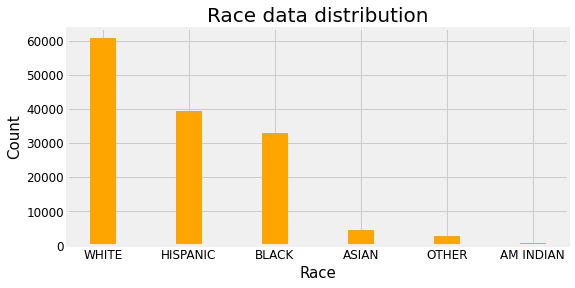

In [8]:
# Ethnicity data distributions

ethnicity=data['RACE'].value_counts().to_dict()
ethnic=[key.strip() for key, value in ethnicity.items()]
count=[value for key, value in ethnicity.items()]

fig = plt.figure(figsize = (8, 4))
plt.bar(ethnic, count, color ='orange', width = 0.3)
plt.rcParams.update({'font.size': 10})
plt.title("Race data distribution", fontsize=20)
plt.xlabel("Race", fontsize=15)
plt.ylabel("Count", fontsize=15)

Observations:

1. Very common race is White.

2. least common race is  Am Indian.

3. White, Hispanic(Spanish), Black ethnicity constitute 95% of total employees.

# Sex:

Text(0.5, 1.0, 'Sex distribution over race')

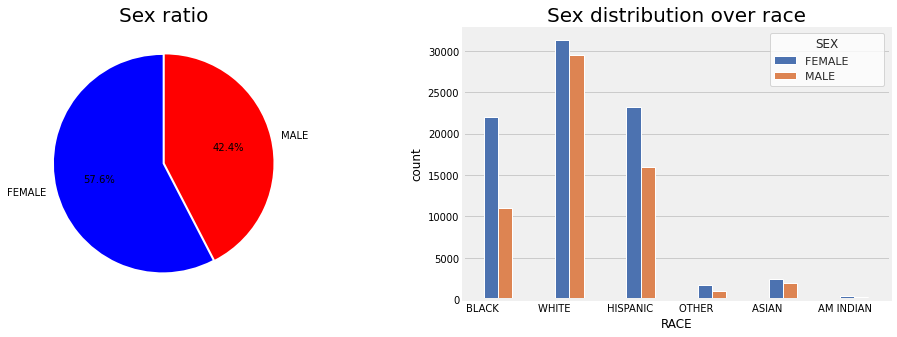

In [9]:
# What is the sex ratio?

gender=data['SEX'].value_counts().to_dict()
keys=[key.strip() for key, value in gender.items()]
values=[value for key, value in gender.items()]

fig, ax = plt.subplots(1,2, figsize = (15, 5))
plt.rcParams.update({'font.size':10})
ax[0].pie(values, labels=keys, colors=('blue', 'red'), startangle=90, explode=(0.01, 0.01), autopct='%1.1f%%')
ax[0].set_title("Sex ratio", fontsize=20)

# How sex ratio distributed over race?

sns.set_theme(style='whitegrid')
plt.rcParams.update({'font.size':5})
sns.countplot(data=data, x="RACE", hue="SEX", width=0.4, saturation=1)
ax[1].set_title('Sex distribution over race', fontsize=20)

Text(0.5, 1.0, 'Family & protective service vs sex')

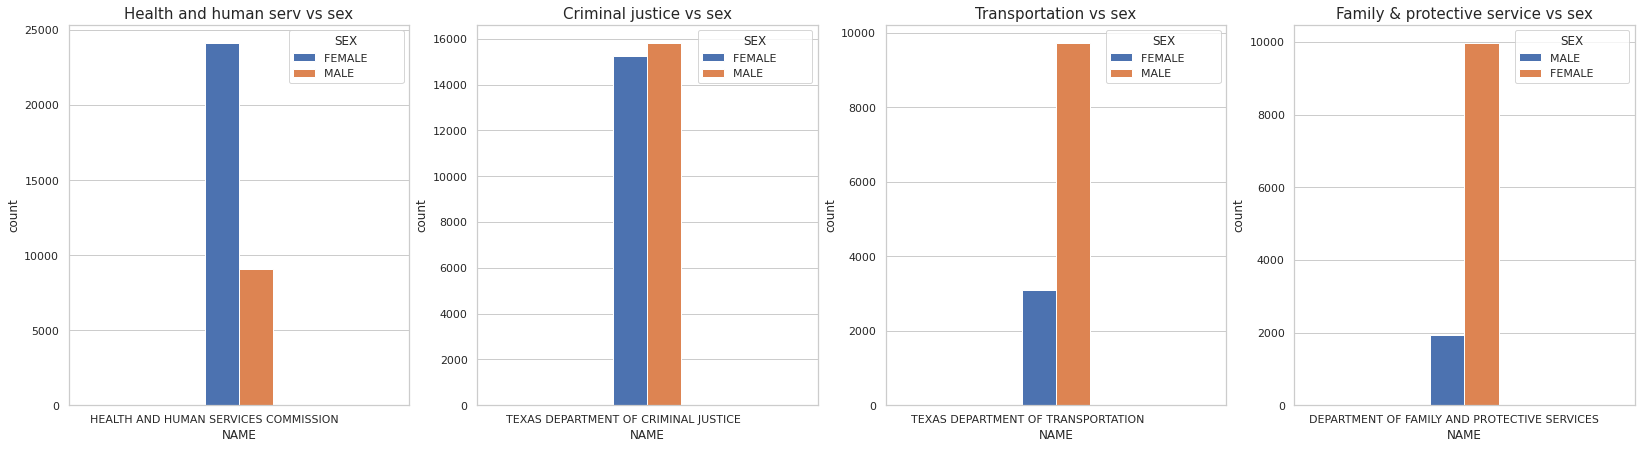

In [10]:
# Top 4 departments sex ratio?

fig = plt.figure(figsize = (25, 7))

fig.add_subplot(141)
sns.set_theme(style='whitegrid')
plt.rcParams.update({'font.size':5})
sns.countplot(data=data[data['NAME']=='HEALTH AND HUMAN SERVICES COMMISSION              '], x='NAME', hue='SEX', width=0.2, saturation=1)
plt.title('Health and human serv vs sex', fontsize=15)

fig.add_subplot(142)
sns.countplot(data=data[data['NAME']=='TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '], x='NAME', hue='SEX', width=0.2, saturation=1)
plt.title('Criminal justice vs sex', fontsize=15)

fig.add_subplot(143)
sns.countplot(data=data[data['NAME']=='TEXAS DEPARTMENT OF TRANSPORTATION                '], x='NAME', hue='SEX', width=0.2, saturation=1)
plt.title('Transportation vs sex', fontsize=15)

fig.add_subplot(144)
sns.countplot(data=data[data['NAME']=='DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      '], x='NAME', hue='SEX', width=0.2, saturation=1)
plt.title('Family & protective service vs sex', fontsize=15)


Observations:

source: https://comptroller.texas.gov/economy/economic-data/women/government-overview.php

1. Dataset contains 57.6% Female and 42.4% male employees, this number intituvely says Texas government supports women empowerment.

2. Considering over all ethnicities, Females employees are more than male.

3. Above website also says that Texas boasts a higher concentration of women working in government jobs. and also there is a evidence that in 2017 women's shares 56% of total jobs.

4. From above graphs its evident that most of the departments having more female employees than male.

# Emptype(employment type):

Text(0, 0.5, 'No of employees')

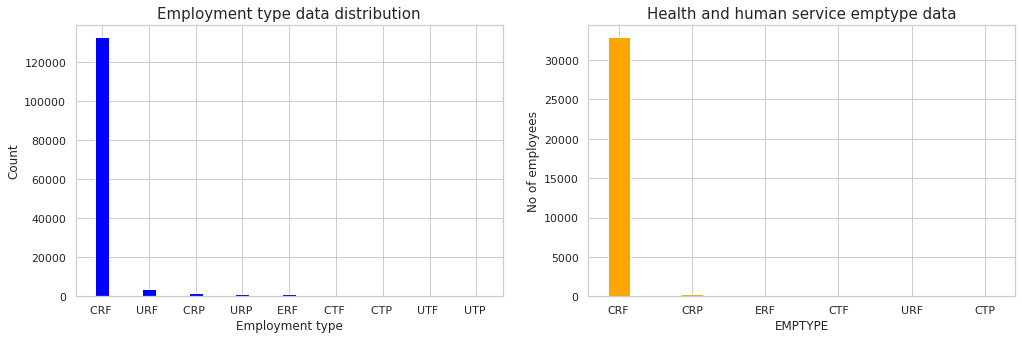

In [11]:
# How employment type data is distributed?

emptype_data=data['EMPTYPE'].value_counts().to_dict()

status=data['EMPTYPE'].value_counts().to_dict()
stat=[key.split("-")[0] for key, value in status.items()]
count=[value for key, value in status.items()]

fig = plt.figure(figsize = (15,5))
fig.add_subplot(121)
plt.bar(stat, count, color ='blue', width = 0.3)
plt.title("Employment type data distribution", fontsize=15)
plt.xlabel("Employment type", fontsize=12)
plt.ylabel("Count", fontsize=12)

fig.add_subplot(122)
dd=data[data['NAME']=='HEALTH AND HUMAN SERVICES COMMISSION              ']
cc=dd.groupby(['NAME','EMPTYPE'])['EMPTYPE'].count().to_dict()
values=cc.values()

keys=['CRF', 'CRP', 'ERF', 'CTF', 'URF', 'CTP']
plt.bar(keys, values, color ='orange', width = 0.3)
plt.title('Health and human service emptype data', fontsize=15)
plt.xlabel('EMPTYPE')
plt.ylabel('No of employees')

[Text(0.5, 0, 'Salary'), Text(0, 0.5, 'URP')]

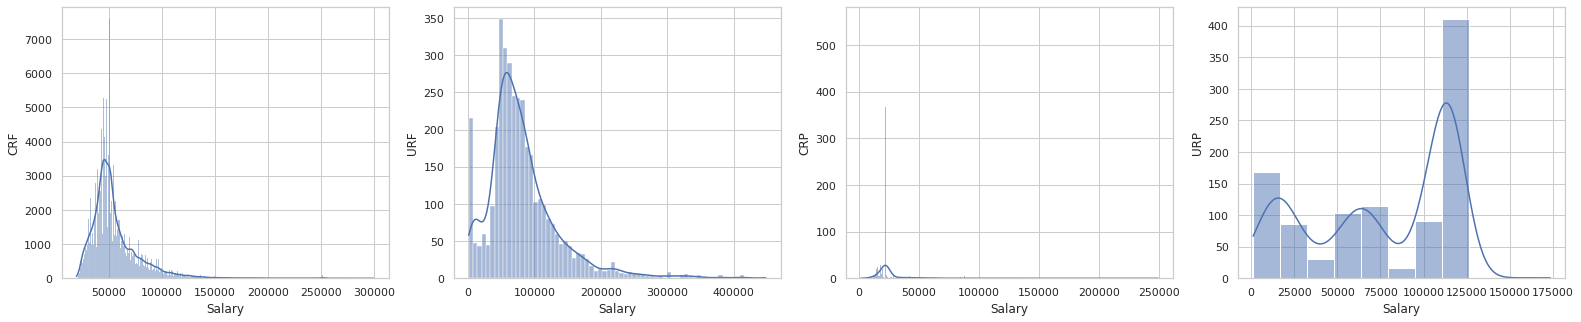

In [12]:
# How annual salary varies with employement type?

fig,ax=plt.subplots(1,4, figsize=(24,5))
aa=data['ANNUAL'][data['EMPTYPE']=='CRF - CLASSIFIED REGULAR FULL-TIME      ']
fig=sns.histplot(aa, kde=True, ax=ax[0])
fig.set(xlabel ="Salary", ylabel = "CRF")

bb=data['ANNUAL'][data['EMPTYPE']=='URF - UNCLASSIFIED REGULAR FULL-TIME    ']
fig=sns.histplot(bb, kde=True, ax=ax[1])
fig.set(xlabel ="Salary", ylabel = "URF")

cc=data['ANNUAL'][data['EMPTYPE']=='CRP - CLASSIFIED REGULAR PART-TIME      ']
fig=sns.histplot(cc, kde=True, ax=ax[2])
fig.set(xlabel ="Salary", ylabel = "CRP")

cc=data['ANNUAL'][data['EMPTYPE']=='URP - UNCLASSIFIED REGULAR PART-TIME    ']
fig=sns.histplot(cc, kde=True, ax=ax[3])
fig.set(xlabel ="Salary", ylabel = "URP")

# Observations:

1. 94% of employees having classified regular full time jobs, which is evident from above graph. 
2. In Health and Human service department, most jobs are regular full time.
3. CRF- employees getting annual average salary of 50000$, wage starts from 25k$ to 300K$. 

# HIREDT(Hire date):

In [13]:
# Highest employments created year and how many?

datetime_object = [datetime.strptime(dd, '%m/%d/%y').date() for dd in data['HIREDT']]

data['Hiremonth']=[ddd.month for ddd in datetime_object]
data['Hireday']=[ddd.day for ddd in datetime_object]
data['Hireyear']=[ddd.year for ddd in datetime_object]

Text(0, 0.5, 'Count')

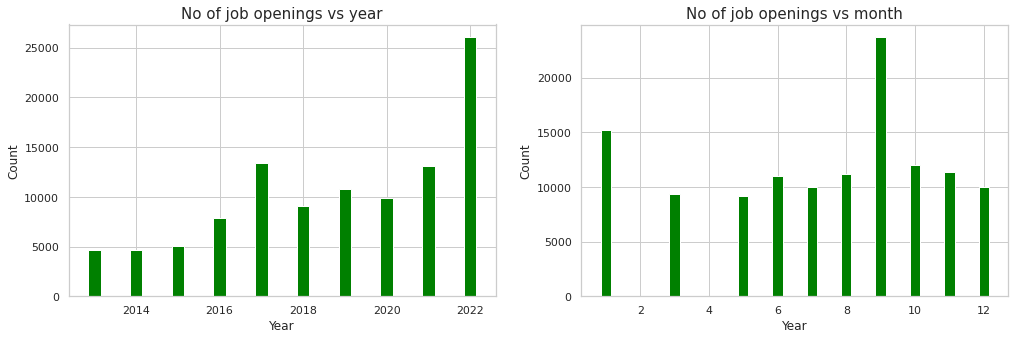

In [14]:
year_dict=data['Hireyear'].value_counts().to_dict()
year_keys_list=list(year_dict.keys())
year_values_list=list(year_dict.values())
year_dict[year_keys_list[0]]

fig = plt.figure(figsize = (15,5))
fig.add_subplot(121)
plt.bar(year_keys_list[0:10], year_values_list[0:10], color ='green', width = 0.3)
plt.title("No of job openings vs year", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

month_dict=data['Hiremonth'].value_counts().to_dict()
month_keys_list=list(month_dict.keys())
month_values_list=list(month_dict.values())
month_dict[month_keys_list[0]]

fig.add_subplot(122)
plt.bar(month_keys_list[0:10], month_values_list[0:10], color ='green', width = 0.3)
plt.title("No of job openings vs month", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

Observations:

1. Highest hiring happend in 2022 and second highest in 2017.

2. From second graph, we can say that typically more hirings happens in sept month.

# RATE:

Text(0.5, 1.0, 'After calculating rate for all records')

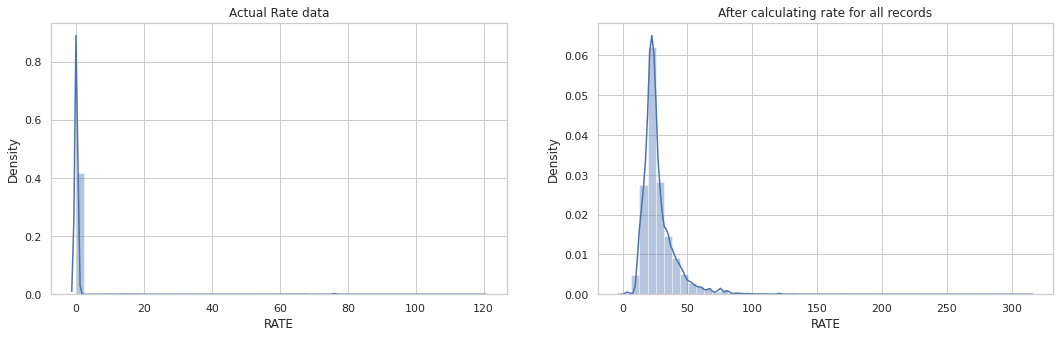

In [15]:
f,ax=plt.subplots(1,2,figsize=(16,5))
sns.distplot(data['RATE'], ax=ax[0])
ax[0].set_title('Actual Rate data')
# Since most of values in rate column are zero, we can fill values using below formula.

data['RATE']=data['MONTHLY']/(data['HRSWKD']*4.333)

sns.distplot(data['RATE'], ax=ax[1])
ax[1].set_title('After calculating rate for all records')

In [16]:
# Lowest salary per hour person details.
data[['NAME','JC TITLE','EMPTYPE']][data['RATE']==data['RATE'].min()]

,NAME,JC TITLE,EMPTYPE
112928,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIALS STAFF ...,URF - UNCLASSIFIED REGULAR FULL-TIME


In [17]:
# Highest salary per hour person details.

data[['NAME','JC TITLE','EMPTYPE']][data['RATE']==data['RATE'].max()]

,NAME,JC TITLE,EMPTYPE
31197,TEACHER RETIREMENT SYSTEM ...,CHIEF INVESTMENT OFFICER ...,ERF - EXEMPT REGULAR FULL-TIME


Observations:

1. Mean salary per hour is 27.5$.

2. Max salary per hour is 312.5$. Person is emempt regular full time employee in teacher retirement system agency    working as chief investment officer.

3. Person getting salary per hour is 0.57$ which is min considering all departments. Person is unclassified    
   regular full time employee in house of representative department as a elected official staff.

# HRSWKD:

<AxesSubplot:xlabel='HRSWKD', ylabel='Count'>

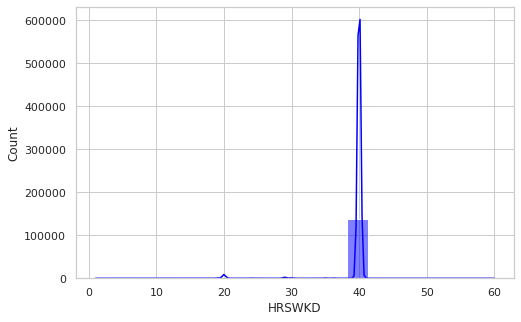

In [18]:
fig, ax=plt.subplots(1,figsize=(7,5))
sns.histplot(data['HRSWKD'], kde=True, ax=ax, color='blue')

In [19]:
# Highest working hours per week

data[['NAME', 'SEX', 'RATE', 'HRSWKD', 'MONTHLY']] [data['HRSWKD']==data['HRSWKD'].max()]

,NAME,SEX,RATE,HRSWKD,MONTHLY
44,STATE PRESERVATION BOARD ...,FEMALE,14.001039,60.0,3639.99


In [20]:
# lowest working hours per week

data[['NAME', 'SEX', 'RATE', 'HRSWKD', 'MONTHLY']] [data['HRSWKD']==data['HRSWKD'].min()]

,NAME,SEX,RATE,HRSWKD,MONTHLY
13,SENATE ...,MALE,25.001154,1.0,108.33


# Observations:

1. On an average employees work 40 hours per week.

2. Female employee from state preservation board working 60 hours and monthly getting paid by 3639.9$.

3. Male employee from Senate department working 1 hour per week and monthly getting paid by 108.3$.

 # MONTHLY/ANNUAL:

<AxesSubplot:>

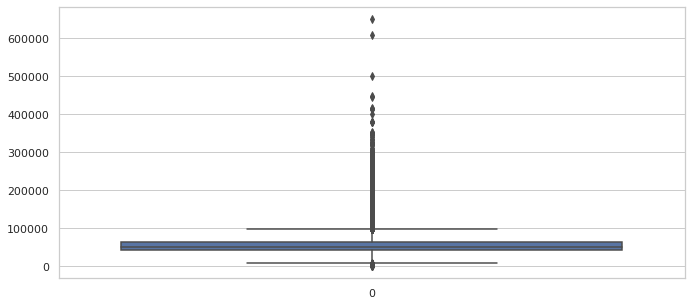

In [21]:
fig, ax=plt.subplots(figsize=(10,5))
sns.boxplot(data['ANNUAL'], ax=ax)

In [22]:
data[['NAME', 'HRSWKD', 'ANNUAL']][data['ANNUAL']==data['ANNUAL'].min()]

,NAME,HRSWKD,ANNUAL
30388,HOUSE OF REPRESENTATIVES ...,10.0,1200.0
76295,HOUSE OF REPRESENTATIVES ...,20.0,1200.0
112928,HOUSE OF REPRESENTATIVES ...,40.0,1200.0


In [23]:
data[['NAME', 'HRSWKD', 'ANNUAL']][data['ANNUAL']==data['ANNUAL'].max()]

,NAME,HRSWKD,ANNUAL
31197,TEACHER RETIREMENT SYSTEM ...,40.0,650000.0


Text(0.5, 1.0, 'Family and protective ser Annual wage disparsity')

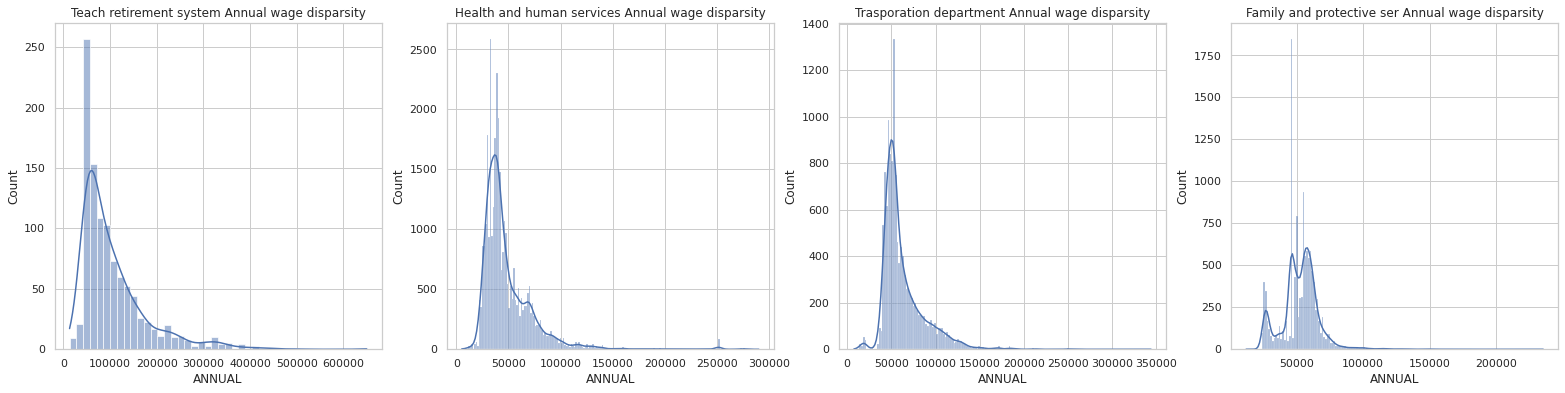

In [24]:
# Wage disparsities of few departments.

fig, ax= plt.subplots(1, 4, figsize=(24,6))
aa=data['ANNUAL'][data['NAME']=='TEACHER RETIREMENT SYSTEM                         ']
sns.histplot(aa, kde=True, ax=ax[0])
ax[0].set_title('Teach retirement system Annual wage disparsity')

bb=data['ANNUAL'][data['NAME']=='HEALTH AND HUMAN SERVICES COMMISSION              ']
sns.histplot(bb, kde=True, ax=ax[1])
ax[1].set_title('Health and human services Annual wage disparsity')

cc=data['ANNUAL'][data['NAME']=='TEXAS DEPARTMENT OF TRANSPORTATION                ']
sns.histplot(cc, kde=True, ax=ax[2])
ax[2].set_title('Trasporation department Annual wage disparsity')

dd=data['ANNUAL'][data['NAME']=='DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      ']
sns.histplot(dd, kde=True, ax=ax[3])
ax[3].set_title('Family and protective ser Annual wage disparsity')

Observations:

1. Annual average salary is 56000$.

2. Minimum annual salary of a person is 1200$, person belongs to house of representatives department.

3. Highest annual salary of a person is 650000$, person belongs to Teacher retirement system department.

4. Wage disparsity of teacher retirement system department is very high, wages ranges from 13000-650000$.


# 4. Data preprocessing

In [25]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from scipy.stats.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import copy

Dropping below features:

1. FIRSTNAME, LASTNAME, MI- Name doesn't contribute in predicting person salary, hence dropping.

2. HIREDIT- This feature has been splitted into three features  Hireyear, Hiremonth, Hiredate intituevly meant HIREDIT information is captured across three features hence dropping to avoid having same information in dataset.

(1.0, 0.0)


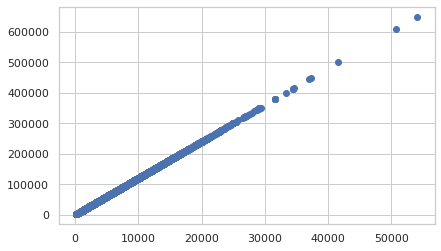

In [26]:
data.drop(columns=['FIRSTNAME','LASTNAME', 'MI', 'HIREDT'], axis=0, inplace=True)

# Relationship between monthly and annual feature:

target=data['ANNUAL']

print(pearsonr(data['ANNUAL'], data['MONTHLY']))

plt.scatter(data['MONTHLY'], data['ANNUAL'])

# Its better to drop one of the feature since both are highly correlated.

data.drop(columns=['MONTHLY','ANNUAL'], axis=1, inplace=True)

In [27]:
ordinalenc= OrdinalEncoder()
onehotenc = OneHotEncoder()

def imputation(datadict, feature):
    if datadict[feature].dtype=='O':
        simp_impute=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        feature_2d=np.array(datadict[feature]).reshape(-1,1)
        impute=simp_impute.fit_transform(feature_2d)
        imputed_feature=impute.flatten().tolist()
    else:
        simp_impute=SimpleImputer(missing_values=np.nan, strategy='mean')
        feature_2d=np.array(datadict[feature]).reshape(-1,1)
        impute=simp_impute.fit_transform(feature_2d)
        imputed_feature=impute.flatten().tolist()
        
    return imputed_feature

def encoder(data):
    data1=copy.deepcopy(data)
    data2=copy.deepcopy(data)
       
    for feature in data1.columns:
        if data1[feature].dtype=='O':
            encoded_feature=ordinalenc.fit_transform(np.array(data1[feature]).reshape(-1,1))
            data1[feature]=encoded_feature
        else:
            data1[feature]=data1[feature]
    
    for feature in data2.columns:
        if data2[feature].dtype=='O':
            enc_feature=(data2.groupby(feature).size())/len(data2)
            data2[feature]=data2[feature].apply(lambda x : enc_feature[x])
        else:
            data2[feature]=data2[feature]

    return data1, data2

def feature_importance(data):
    metric={}
    gbr=GradientBoostingRegressor()
    for feature in data.columns:
        input_feature=np.array(data[feature]).reshape(-1,1)
        x_train, x_test, y_train, y_test=train_test_split(input_feature, target, test_size=0.3, random_state=201)
        gbr.fit(x_train,y_train)
        y_pred=gbr.predict(x_test)
        score=r2_score(y_test,y_pred)
        metric[feature]=score
    
    #Top important features
    key=list(metric.keys())
    value=list(metric.values())
    sorted_value_index=np.argsort(value)
    sorted_metrics={}
    sorted_metrics={key[i]:value[i] for i in sorted_value_index if value[i]>0.2}

    important_features=data[list(sorted_metrics.keys())]

    return metric, important_features 

In [28]:
# Below datapreprocessing functions has below features.
# 1.duplicate row/column checking
# 2.missing value handling
# 3.feature encoding
# 4.Gives important features

def datapreprocessing(data):  
    #1.check for duplicate observations/columns:
    
    print("dataset shape:", data.shape)
    data=data.T.drop_duplicates().T
    data.reset_index(drop=True, inplace=True)
    print("dataset shape:", data.shape)   

    #2.checking and handling missing values:
   
    missing_data=[]
    for feature in data.columns:
        if data[feature].isnull().mean()>=0.8:
            missing_data.append([feature, (round(data[feature].isnull().mean(), 5))*100])
            data.drop(feature, axis=1, inplace=True)
        else:
            imputed_feature=imputation(data, feature)
            data[feature]=imputed_feature
    
    print(tabulate(missing_data, headers=['Features', 'Missing value %'], tablefmt='grid'))

    print("dataset shape:", data.shape)
    
    #3.Converting categorical to numeric data
    data1, data2 = encoder(data)
    print("data1 shape:", data1.shape)
    print("data2 shape:", data2.shape)
    
    #4.Extracting only important features
    
    metric1, important_features1 = feature_importance(data1)
    metric2, important_features2 = feature_importance(data2)
    
    return metric1, data1, metric2, data2         

important_features1, data1, important_features2, data2 = datapreprocessing(data) 

dataset shape: (140724, 18)
dataset shape: (140724, 18)
+-------------------------+-------------------+
| Features                |   Missing value % |
+=========================+===================+
| duplicated              |            99.955 |
+-------------------------+-------------------+
| multiple_full_time_jobs |            99.984 |
+-------------------------+-------------------+
| combined_multiple_jobs  |            99.995 |
+-------------------------+-------------------+
| hide_from_search        |            99.988 |
+-------------------------+-------------------+
| summed_annual_salary    |            99.988 |
+-------------------------+-------------------+
dataset shape: (140724, 13)
data1 shape: (140724, 13)
data2 shape: (140724, 13)


Rate feature is highly correlated with target column, by keeping it will results very good results but it mainly due to data leakge hence its better to drop.

# 5. Data modelling and Evaluation.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

We will try to understand model behaviour under different encoding scenarios.

1. Ordinal encoding- will be using only ordinal encoding for all categorical features and building algorithms.

2. Frequency encoding-will be using only Frequency encoding for all categorical features and building algorithms.

In [30]:
# ordinal encoding scheme and let us understand about data leakage with example:

# Acutally RATE feature is highly correlated with target, will understand model accuracy with and without RATE.

data1_with_RATE=data1
data1_without_RATE=data1.drop('RATE', axis=1)

# Gradient boosting algorithm
param_grid={'learning_rate':[0.7, 0.8],
            'n_estimators':[200, 300]
           }

gbr=GradientBoostingRegressor()
lreg=LinearRegression()
svr=SVR(kernel='rbf', gamma='auto')

ord_score=[]

for dd in [data1_with_RATE, data1_without_RATE]:
    steps=[("standardscaler", StandardScaler())]
    pipe=Pipeline(steps)
    dataa=pipe.fit_transform(dd, target)
    x_train, x_test, y_train, y_test=train_test_split(dataa, target, test_size=0.3, random_state=111)
    
    for model in [gbr, lreg]:
        if model==gbr:
            param_grid={'learning_rate':[0.7, 0.8],
            'n_estimators':[200, 300]
           }
            reg=RandomizedSearchCV(model, param_distributions=param_grid, verbose=True, n_jobs=-1, refit=True)
            reg.fit(x_train, y_train)
            ord_score.append(reg.best_score_)
        else:
            lreg.fit(x_train, y_train)
            y_pred=lreg.predict(x_test)
            ord_score.append(r2_score(y_test, y_pred))

print(ord_score)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[0.9990634028526507, 0.991628482899254, 0.9193017027662052, 0.23441718021031066]


Observations:

1. Understood from above score that there is data leakage issue hence getting very good and same accuracy for both models.

2. important_features1 contains correlation each feature correlation with target column and understood that RATE column is highly correlated, which is source of data leakage and that has to be removed.

In [31]:
# Frequency encoding technique:
data2.drop('RATE', axis=1, inplace=True) #dropping due to data leakage issue

gbr=GradientBoostingRegressor()
lreg=LinearRegression()

steps=[("standardscaler", StandardScaler())]
pipe=Pipeline(steps)
dataa=pipe.fit_transform(data2, target)
x_train, x_test, y_train, y_test=train_test_split(dataa, target, test_size=0.3, random_state=111)    

fre_score=[]

for model in [gbr, lreg]:       
    if model==gbr:
        param_grid={'learning_rate':[0.7, 0.8],
        'n_estimators':[200, 300]}
        reg=RandomizedSearchCV(model, param_distributions=param_grid, verbose=True, n_jobs=-1, refit=True)
        reg.fit(x_train, y_train)
        fre_score.append(reg.best_score_)
    else:
        lreg.fit(x_train, y_train)
        y_pred=lreg.predict(x_test)
        fre_score.append(r2_score(y_test, y_pred))

print(fre_score)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[0.7584787383235112, 0.2520718114890971]


Observations:

1. Models- Gradient boosting algorithm performing very good(r2_Score=91.8) and linear regression giving very bad(r2_score around 25) results, hence final model is gradient boosting.

2. Encoding- ordinal encoding technique giving good results comparatively frequency encoding. Reason might be, feels like there is order exists in features like JC title and JOb class hence getting good results with ordinal encoding. 

3. Features like AGY, NAME, JOBCLASS, JC TITLE, EMPTYPE are important features or whose contribution is more in deciding a employee salary. (this conclusion drawn from user defined function "feature_importance" which is defined before dataprocessing step.)